In [33]:
import  numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [35]:
sns.set()
from sklearn.cluster import KMeans

In [37]:
df = pd.read_csv("countries.csv")

In [39]:
df.head(5)

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


In [41]:
x = df["Longitude"]
y = df["Latitude"]

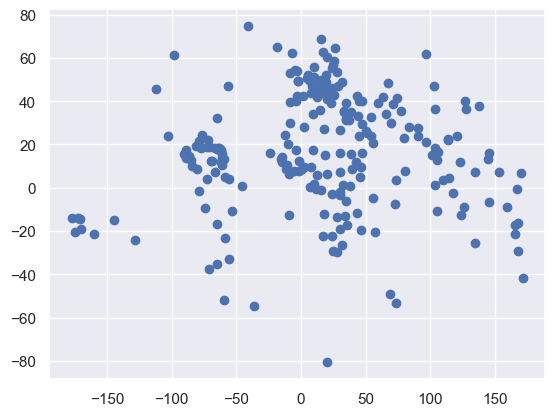

In [43]:
plt.scatter(x ,y)
plt.show()

In [45]:
df_extracted = df.iloc[:, 1:3]

In [52]:
df_extracted.head()

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450


In [54]:
ss = StandardScaler()

In [56]:
df_standardized = pd.DataFrame(ss.fit_transform(df_extracted), columns=df_extracted.columns)


In [58]:
df_standardized.head()

,Longitude,Latitude
0,-1.171629,-0.175422
1,0.720657,0.628927
2,0.046226,-1.111849
3,-1.075368,0.039797
4,0.081187,0.904683


In [68]:
kmeans = KMeans(3)

In [70]:
kmeans.fit(df_standardized)

KMeans(n_clusters=3)

In [74]:
identified_clusters = kmeans.fit_predict(df_standardized)

In [80]:
print(identified_clusters)

[1 0 2 1 0 0 0 0 1 0 1 2 2 2 1 2 0 0 2 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 2 0
 2 2 0 1 0 1 2 2 2 1 1 2 1 1 1 1 1 0 0 0 0 2 1 0 1 0 1 0 2 0 0 2 0 2 1 0 0
 2 2 0 0 0 1 1 1 1 2 0 1 0 1 2 1 2 2 1 0 1 0 2 0 0 2 2 0 0 0 0 0 0 1 0 0 0
 0 0 2 0 2 1 1 0 0 0 2 0 1 0 1 0 2 2 0 0 0 2 1 0 0 0 2 2 1 2 0 1 0 2 0 0 2
 2 1 1 2 2 2 2 2 0 2 1 1 1 0 0 0 2 2 0 0 1 1 1 2 2 2 0 1 0 0 1 0 1 0 0 0 2
 0 0 0 2 1 2 1 1 2 1 1 0 2 2 0 0 1 1 0 0 0 2 1 2 0 1 0 1 2 0 0 2 1 1 0 0 2
 2 2 0 1 1 0 0 1 1 1 1 2 2 1 1 2 2 2 2]


In [84]:
df_new = df.copy()

In [86]:
df_new['clusterNo'] = identified_clusters

In [88]:
df_new.head()

,name,Longitude,Latitude,clusterNo
0,Aruba,-69.982677,12.520880,1
1,Afghanistan,66.004734,33.835231,0
2,Angola,17.537368,-12.293361,2
3,Anguilla,-63.064989,18.223959,1
4,Albania,20.049834,41.142450,0


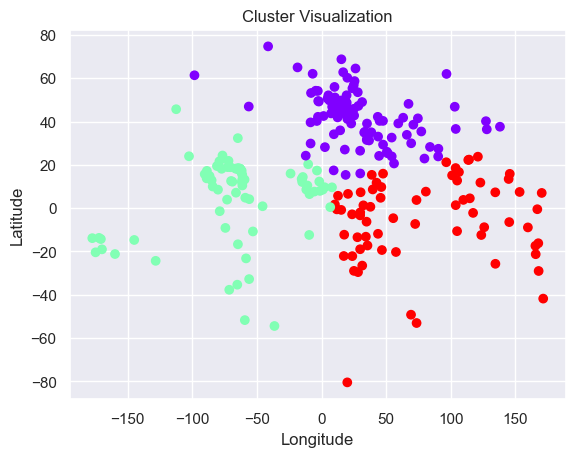

In [92]:
plt.scatter(df_new['Longitude'], df_new['Latitude'], c=df_new['clusterNo'], cmap='rainbow')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Cluster Visualization')
plt.show()

In [94]:
wcss = []
for i in range(1, 11):  # Adjust the range as needed
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_standardized)  # Use the standardized data
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

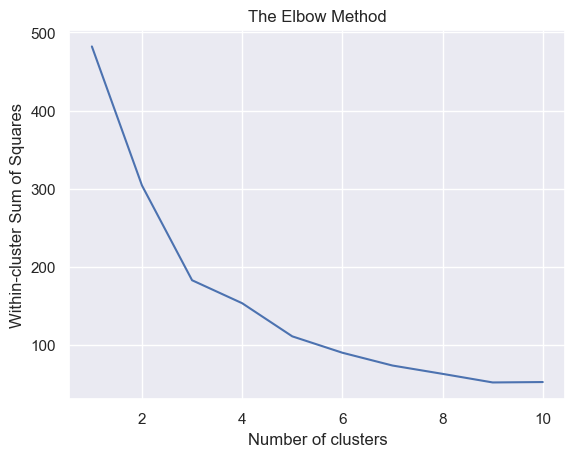

In [96]:
number_clusters = range(1, 11)  # The same range used in the loop
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.show()

In [98]:
#Activity 2
cus = pd.read_csv("Customers.csv")

In [102]:
cus.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


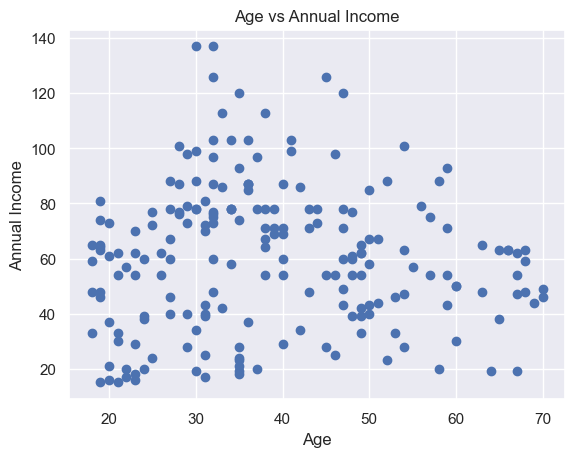

In [104]:
plt.scatter(cus['Age'], cus['AnnualIncome'])
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Age vs Annual Income')
plt.show()

In [106]:
#Step 2
def cap_outliers(series, lower_quantile=0.01, upper_quantile=0.99):
    lower_bound = series.quantile(lower_quantile)
    upper_bound = series.quantile(upper_quantile)
    return np.clip(series, lower_bound, upper_bound)

In [108]:
cus['Age'] = cap_outliers(cus['Age'])
cus['AnnualIncome'] = cap_outliers(cus['AnnualIncome'])

In [110]:
print(cus[['Age', 'AnnualIncome']].describe())

              Age  AnnualIncome
count  200.000000    200.000000
mean    38.840100     60.461000
std     13.947152     25.949731
min     18.000000     15.990000
25%     28.750000     41.500000
50%     36.000000     61.500000
75%     49.000000     78.000000
max     69.010000    126.110000


In [112]:
#Step 3
scaler = StandardScaler()
cus_standardized = scaler.fit_transform(cus[['Age', 'AnnualIncome']])

In [114]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(cus_standardized)
    wcss.append(kmeans.inertia_)

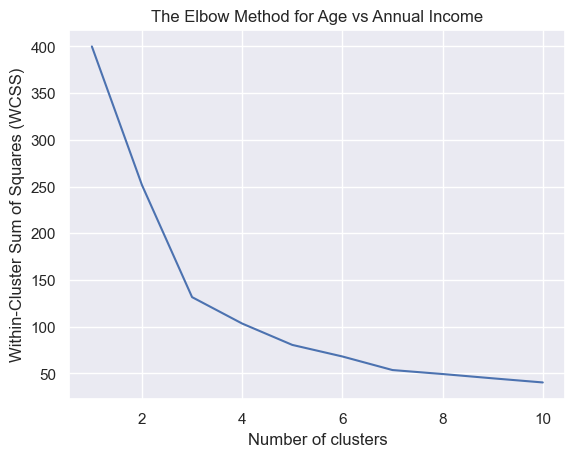

In [116]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('The Elbow Method for Age vs Annual Income')
plt.show()

NameError: name 'cus_standardized_income_spending' is not defined